##### _This notebook compares DBSCAN and KMeans clustering on earthquake data._  
##### _Evaluation is based on Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index._

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from kneed import KneeLocator

In [37]:
#Preparing the data
earthquake_df = pd.read_csv("2025_09_04_After_Earthquake_Monthly.csv",index_col=0)
earthquake_df
X=earthquake_df[['latitude','longitude']].copy()
X_scaled = StandardScaler().fit_transform(X)

In [38]:
#DBSCAN CLustering 
dbscan = DBSCAN(eps=0.3, min_samples=10)
earthquake_df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)
#  DBSCAN Cluster Evaluation
if len(set(earthquake_df['dbscan_cluster'])) > 1:
    sil_db = silhouette_score(X_scaled, earthquake_df['dbscan_cluster'])
    dbi_db = davies_bouldin_score(X_scaled, earthquake_df['dbscan_cluster'])
    ch_db = calinski_harabasz_score(X_scaled, earthquake_df['dbscan_cluster'])
    print("\nDBSCAN Evaluation:")
    print(f"Silhouette Score: {sil_db:.3f}, Davies-Bouldin Index: {dbi_db:.3f}, Calinski-Harabasz Index: {ch_db:.3f}")
else:
    print("\nDBSCAN did not form multiple clusters.")



DBSCAN Evaluation:
Silhouette Score: 0.712, Davies-Bouldin Index: 1.070, Calinski-Harabasz Index: 10407.112


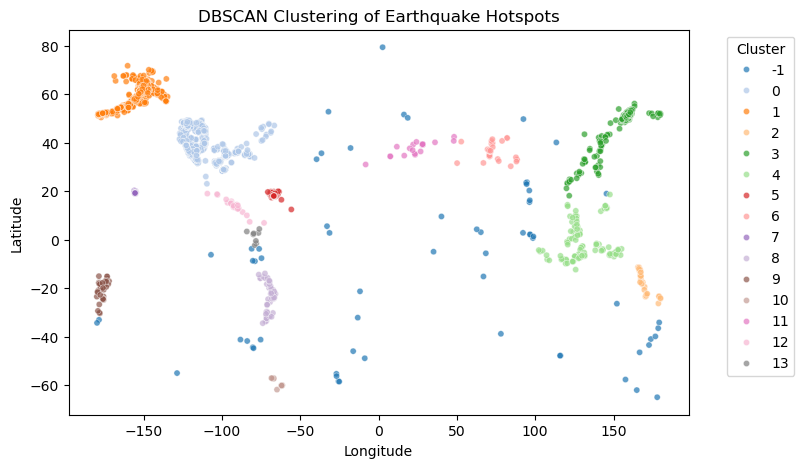

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = earthquake_df,x='longitude',y='latitude',hue='dbscan_cluster',palette='tab20',s=20, alpha=0.7)
plt.title("DBSCAN Clustering of Earthquake Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
#Kmeans Clustering
#Find Optimal K (Elbow Method - Automated)
inertia = []
K_range = range(2, 15)  # try k from 2 to 14
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
kloc  = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = kloc.elbow
print("Optimal K :",optimal_k)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
earthquake_df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
sil_k = silhouette_score(X_scaled, earthquake_df['kmeans_cluster'])
dbi_k = davies_bouldin_score(X_scaled,earthquake_df['kmeans_cluster'])
ch_k = calinski_harabasz_score(X_scaled, earthquake_df['kmeans_cluster'])
print("KMeans Evaluation:")
print(f"Silhouette Score: {sil_k:.3f}, Davies-Bouldin Index: {dbi_k:.3f}, Calinski-Harabasz Index: {ch_k:.3f}")

Optimal K : 5
KMeans Evaluation:
Silhouette Score: 0.723, Davies-Bouldin Index: 0.419, Calinski-Harabasz Index: 21375.085


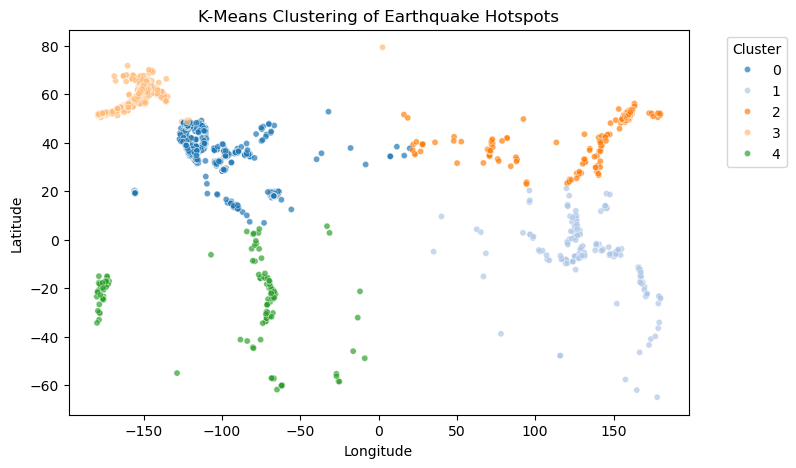

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = earthquake_df,x='longitude',y='latitude',hue='kmeans_cluster',palette='tab20',s=20, alpha=0.7)
plt.title("K-Means Clustering of Earthquake Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Interpretation
__DBSCAN:__
_Good Silhouette (0.712), so it does find reasonably separated clusters.  
But DBI is high (1.07 → clusters not as compact).  
CH is about half of KMeans, so weaker cluster definition.  
DBSCAN works best if clusters are irregular shapes or you have noise/outliers._

__KMeans (k=5):__  
_Excellent Silhouette (0.723, best of both).  
DBI is very low (0.419 → compact clusters).  
CH is very high (21k → strong separation).  
Suggests much cleaner, more structured clusters._